<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)<br>
Aluno [Rafael Barbosa](https://www.linkedin.com/in/barbosa89/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [4]:
import seaborn as sns

data1 = sns.load_dataset("diamonds")
data1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Text(0.7, 0.7, 'Upper limit: 11885.62')

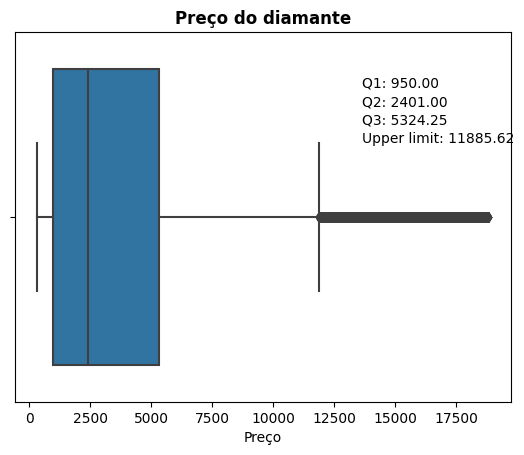

In [54]:
# gráfico do exercício 1
import seaborn as sns

data1 = sns.load_dataset("diamonds")
diamonds = sns.boxplot(x=data1["price"])
diamonds.set_title("Preço do diamante", fontsize=12, fontweight="bold")
diamonds.set_xlabel("Preço", fontsize=10)

# Calculate quartiles and limits
q1, q2, q3 = data1["price"].quantile([0.25, 0.5, 0.75])
iqr = q3 - q1
# lower_limit = q1 - 1.5 * iqr
# lower_limit = data1["price"].min()
# lower_limit = data1["price"].quantile(0.01)
upper_limit = q3 + 1.5 * iqr

# Add text annotations for quartiles and limits
# diamonds.text(0.7, 0.9, f"Lower limit: {lower_limit:.2f}", transform=diamonds.transAxes)
diamonds.text(0.7, 0.85, f"Q1: {q1:.2f}", transform=diamonds.transAxes)
diamonds.text(0.7, 0.8, f"Q2: {q2:.2f}", transform=diamonds.transAxes)
diamonds.text(0.7, 0.75, f"Q3: {q3:.2f}", transform=diamonds.transAxes)
diamonds.text(0.7, 0.7, f"Upper limit: {upper_limit:.2f}", transform=diamonds.transAxes)

# print(f"Lower limit: {lower_limit:.2f}", f"Q1: {q1:.2f}", f"Q2: {q2:.2f}", f"Q3: {q3:.2f}",f"Upper limit: {upper_limit:.2f}")


**Insight do gráfico 1**: Os preços outliers estão acima de 10000, a partir do boxplot do preço dos diamantes, onde nota-se que os preços estão concentrados ao redor de 2500.

---

## 2\. Correlação entre o preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [15]:
import seaborn as sns

data2 = sns.load_dataset("diamonds")
data2.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


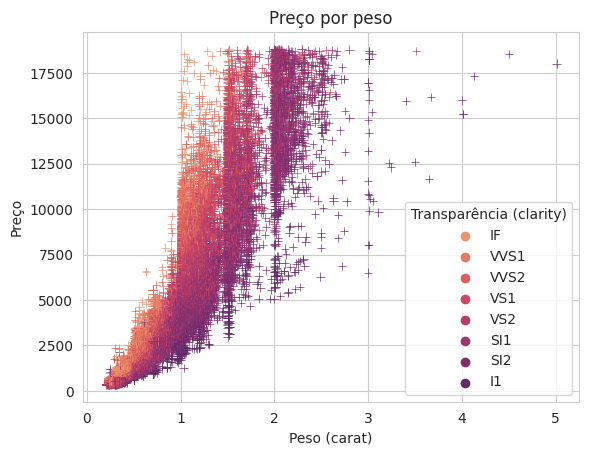

In [79]:
# gráfico do exercício 2

with sns.axes_style('whitegrid'):

  diamonds = sns.scatterplot(data=data2, x="carat", y="price", marker="+", hue="clarity", palette="flare")
  diamonds.set(title='Preço por peso', ylabel='Preço', xlabel='Peso (carat)');
  diamonds.get_legend().set_title("Transparência (clarity)");

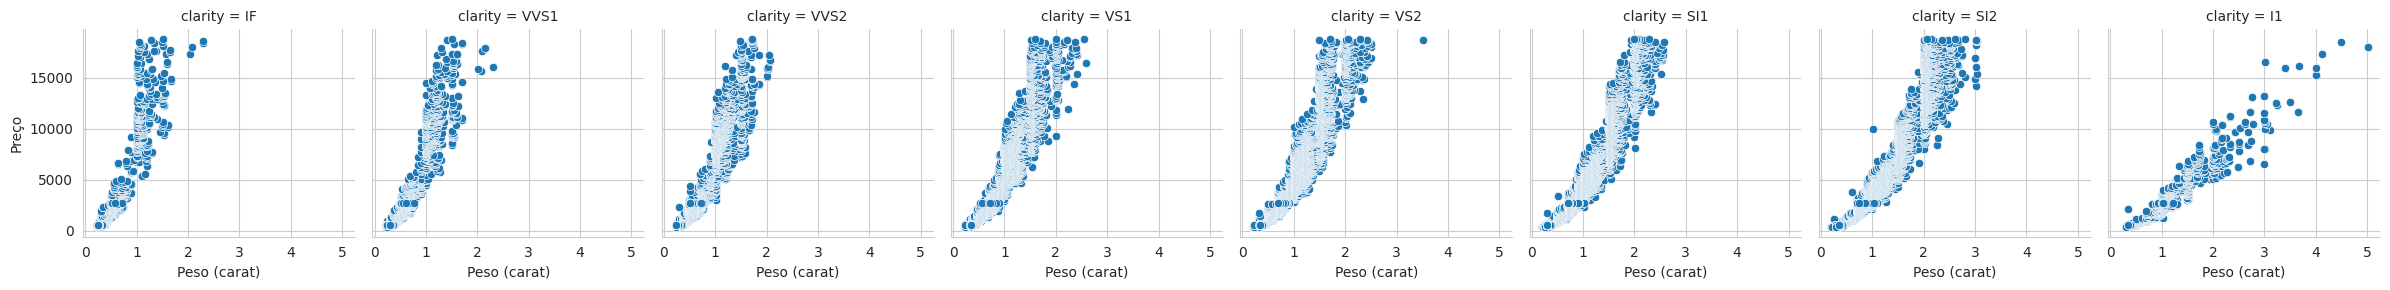

In [85]:
#alternativa exercício 2
with sns.axes_style('whitegrid'):
  diamonds = sns.FacetGrid(data=data2, col="clarity")
  diamonds.map(sns.scatterplot,'carat','price')
  diamonds.set(ylabel='Preço', xlabel='Peso (carat)');


**Insight do gráfico 2**: Os gráficos do exercício 2 indicam relação direta entre o preço e peso, ou seja, diamantes maiores têm preço maior, e também a tranparência IF corresponde à diamantes de peso menor enquanto que a transparência I1 corresponde à diamantes de maior peso.

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [87]:
import seaborn as sns

data3 = sns.load_dataset("mpg")
data3.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


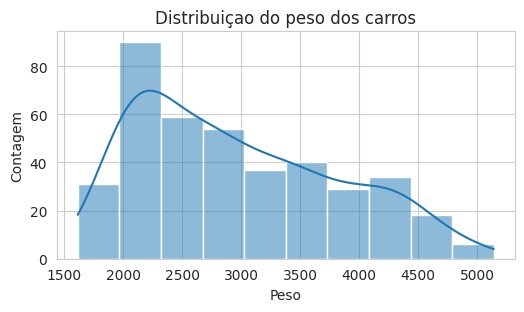

In [ ]:
# gráfico do exercício 3
import matplotlib.pyplot as plt

# cars = sns.histplot(x=data3["weight"])

with sns.axes_style('whitegrid'):
  fig, ax = plt.subplots(figsize=(15/2.54,7.5/2.54))
  cars = sns.histplot(x=data3["weight"], kde=True)
  cars.set(title='Distribuiçao do peso dos carros', xlabel='Peso', ylabel='Contagem');


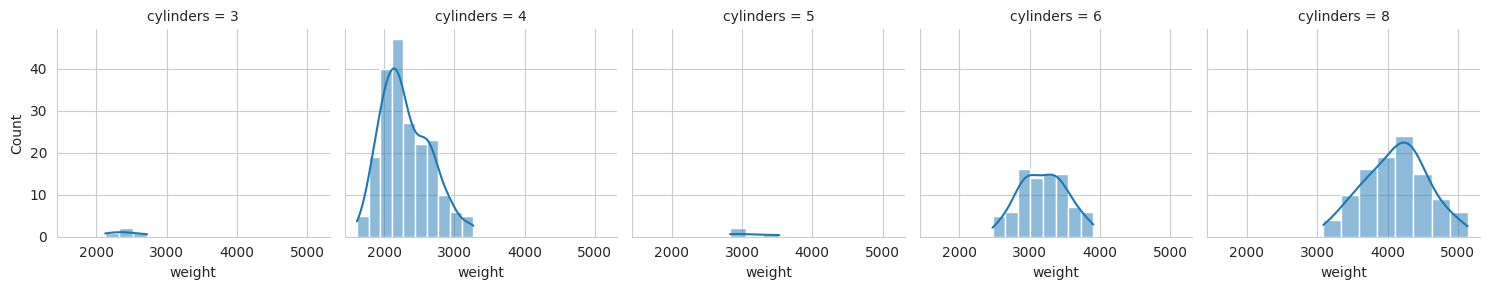

In [ ]:
import matplotlib.pyplot as plt

with sns.axes_style('whitegrid'):
  grafico = sns.FacetGrid(data=data3, col="cylinders")
  grafico.map(sns.histplot, "weight", kde=True)


**Insight do gráfico 3**: A distribuição do peso dos carros deste conjunto de dados aponta para uma concentração entre os pesos de 2000 e 2500, e quando o conjunto de dados é agrupado por número de cilindros nota-se que carros de 4 cilindros estão entre os de menor peso e os de 8 cilindros estão situados como os de maior peso.

---